# Advanced AI for Business Applications 
## Neural Network Refresher

#### Resources and references from MSBA 6461, Spring 2024, Mochen Yang   
Professor's GitHub link: https://github.com/mochenyang/MSBA6460-Advanced-AI.git

# Table of contents
1. [Introduction](#intro)
1. [Refresher on Neural Networks](#nn)
    - [Feedforward Neural Network Architecture](#nn_basic)
        - [Layers](#nn_basic_layers)
        - [Weights](#nn_basic_weights)
        - [Activation Functions](#nn_basic_activation)
    - [Training Neural Networks](#nn_train)
        - [Objective Function](#nn_train_objective)
        - [Gradient Descent](#nn_train_gradient)
        - [Batch, Epoch, and Stochastic Gradient Descent](#nn_train_sgd)
    - [Build Neural Networks with Keras](#nn_implementation)

# Introduction <a name="intro"></a>

## What Does This Course Cover?

This course is designed to cover two distinct (yet connected) topics in advanced machine learning:
1. **Natural Language Understanding** (a.k.a. natural language processing, text mining, text analytics, etc.):  
    - How to process textual data and build machine learning models for useful tasks;
    - Topics range from basic text processing to representation learning to neural-network-based predictive models.
    - Also briefly introduce some cutting-edge NLP models (e.g., transformers, BERT, GPT).  
    
    
2. **Reinforcement Learning**:
    - A gentle but formal introduction to reinforcement learning;
    - Topics include multi-arm bandit model and finite Markov decision processes.

## Objectives of Learning 

1. Demystifying the "AI Hype":
    - Most of the topics covered in this course have been hailed as "AI". But the what it means for a technology to be "AI" keeps changing;
    - By diving into the technical details behind them, I hope to give you a more sober understanding of what they are and what they can / cannot do.
2. Build working intuitions of advanced theoretical concepts, including:
    - NLP: embedding, recurrent neural network, LSTM, GRU, encoder-decoder architecture, attention, transformer, etc.
    - Reinforcement Learning: agent, policy, states, value iteration, policy iteration, Monte Carlo, etc.
3. Train technical skills to use the techniques discussed in this course:
    - NLP: {`sklearn`, `nltk`, `keras`, `numpy`}.
    - Reinforcement Learning: basic python programming.

## How to Learn Better

1. Ask questions, then ask more questions:
    - These are complex / advance / challenging topics that are not easy to understand, and we go reasonably deep in this course;
    - At some point, you will get confused. That's when you need to speak up (during class, schedule appointments with me, etc.) to get further clarifications;
    - I reserve the right to say "I don't know".
2. Be a critical learner. Always bear in mind that the topics we cover are "cutting edge":
    - With the exception of the reinforcement learning module (which is relatively well established), almost all of the NLP topics we cover are developed in the past decade (many developed in the past 3-5 years);
    - It means that you should not treat them as "absolute truth", but rather "our current state-of-the-art";
    - Hopefully this prevents you from thinking "deep learning solves all my problems";
3. Get your hands dirty:
    - For me, the best way to learn complex algorithm / technical concept is to implement it myself;
    - Coding in this course is often more than calling some well-written functions in some packages. Some advanced NLP models are too new and most reinforcement learning models are too idiosyncratic to be implemented in standard packages;
    - Spend time examining the code (and practice yourself) not only helps you with technical skills, but also facilitates the understanding of the underlying concepts and algorithms.

# Refresher on Neural Networks <a name="nn"></a>

## Feedforward Neural Network Architecture <a name="nn_basic"></a>

Feedforward neural networks (a.k.a. multilayer perceptron) are the most basic neural network architecture.    
This part offers a brief review of its key components, training strategy, and implementation using `keras`.    
Understanding of feedforward neural networks will be important for more advanced topics (e.g. recurrent neural networks).

<font color="red">**Aggregation** and **transformation** are the 2 essential components of NN</font>

### Layers <a name="nn_basic_layers"></a>

A feedforward neural network consists of multiple **layers** connected one after another.   
Here is what a fully-connected feedforward neural network with three layers (input, hidden, output) looks like.

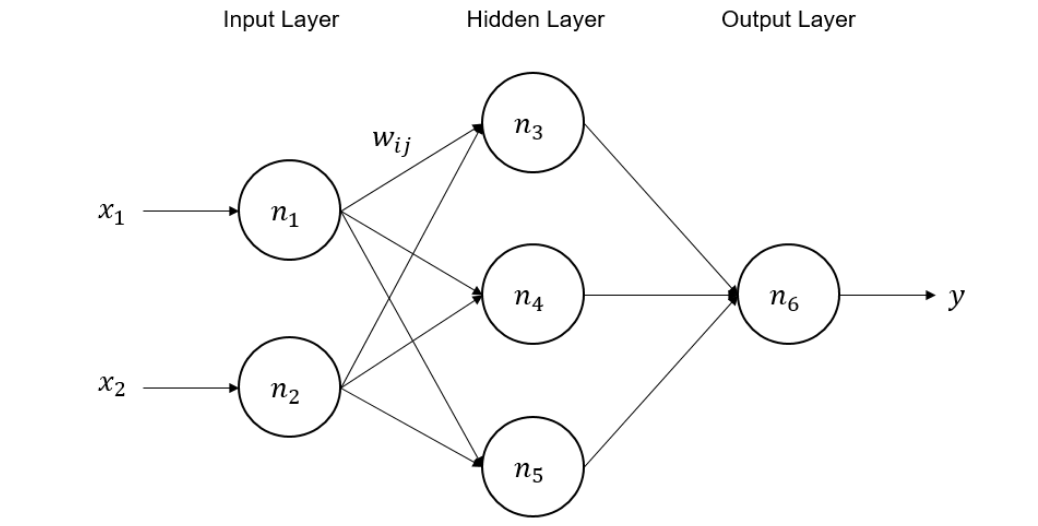

Typically, a feedforward neural network has 1 input layer, 1 or more hidden layers in the middle, and 1 output layer. Each layer can contain one or more **neurons** (in the above case, there are 2, 3, 1 neurons in each of the three layers). Neurons in different layers have different roles:
- Neurons in the input layer typically takes the inputs and pass them on to subsequent layers;
- Neurons in the hidden layer **aggregates** information from the previous layer, apply some form of **transformation**, then pass on the resulting information;
- Neurons in the output layer **aggregates** information from the previous layer, apply some form of **transformation**, then output the results (i.e., predictions).

<font color="blue">Intuition of a feedforward neural network: takes input information, aggregates and transforms them in various different ways and steps, and finally produces some predictions.</font>

### Weights <a name="nn_basic_weights"></a>

Weights in a neural network describe **how information from a previous layer is aggregated**. In a fully-connected feedforward neural network, there is a weight $w_{ij}$ between neurons $i$ and $j$ of two consecutive layers.
<font color="red">**They are parameters that the NN needs to learn.**</font>

Take neuron $n_3$ in the above figure as an example. It is connected with both input neurons, and will receive $w_{13}x_1 + w_{23}x_2$ as its input.

### Activation Functions <a name="nn_basic_activation"></a>

A neuron doesn't just pass on the input it receives - it also transform it using a so called **activation function $f(.)$**. Neurons in different layers often use different activation functions (to achieve different purposes):

- Activation functions in the **input layer** is typically just an **identity function** (i.e., pass on what you receive, no actual transformation);
- Activation functions in the **hidden layer** is typically some kind of **nonlinear continuous function**;
- Activation functions in the **output layer** also tend to be certain **nonlinear continuous function**, but the choice is often **determined by the desired type of output** (e.g., predicted probabilities in classification tasks and real values in numeric prediction tasks).

<font color="red">**Question: why do we need activation function? Why can't each neuron simply passes on the (aggregated) information it receives?**
- Activation functions are necessary to prevent linearity. Without them, the data would pass through the nodes and layers of the network only going through linear functions.  
- Thus, the nonlinearity allows neural networks to develop complex representations and functions based on the inputs that would not be possible with a simple linear regression model.</font>

**Common choices of activation functions and their characteristics**:  

1. Identity function: 

$$f(x) = x$$

- Often used in **input layer**, passes on the information it receives without any actual transformation.

2. Rectified Linear Unit (ReLU): 

$$f(x) = \max\{x, 0\}$$

- Often used in **hidden layers**, passes on the information it receives as long as it is positive; otherwise pass on 0.
- Motivated by the biological neurons in our brain. It "fires" a signal to other connected neurons when the signal it receives is strong enough.

3. Sigmoid function (logistic function):  
<font color="red">Usually used as the last layer for classification tasks since we want the probabilities</font>

$$f(x) = \frac{1}{1 + e^{-x}}$$
    
- Often used in the output layer for a **binary classification** task, because the output of a sigmoid function is always between 0 and 1, which is suitable to represent a probability.
- It also has a very nice mathematical property: $f'(x) = f(x)(1-f(x))$. In other words, one <font color="red">can compute the derivative of a sigmoid function very easily. **We love this property since it gives gradient easily.**</font>

4. Softmax: 

$$f(x_1, x_2, \ldots, x_k) = \left[ \frac{e^{x_1}}{\sum_{i = 1}^{k} e^{x_i}}, \frac{e^{x_2}}{\sum_{i = 1}^{k} e^{x_i}}, \ldots, \frac{e^{x_k}}{\sum_{i = 1}^{k} e^{x_i}} \right]$$
    
- Often used in the output layer for a **$k$-class classification** task. This is a straightforward generalization of the sigmoid function to multiple dimensions.
- The output conveniently represents the probability of belonging to each of the $k$ classes.
    
5. Hyperbolic tangent:  
<font color="red">Can be used as regularizer</font>

$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \doteq \tanh(x)$$

- Often used in the hidden layers, especially in deep networks when there are a **large number of hidden layers**.
- Like sigmoid, it also has a nice property regarding derivative: $f'(x) = 1 - f^2(x)$.
- Its output is always between **-1 and 1**. Therefore, it helps prevent the information being "blown up" over many hidden layers.

### Activation Function Comparison

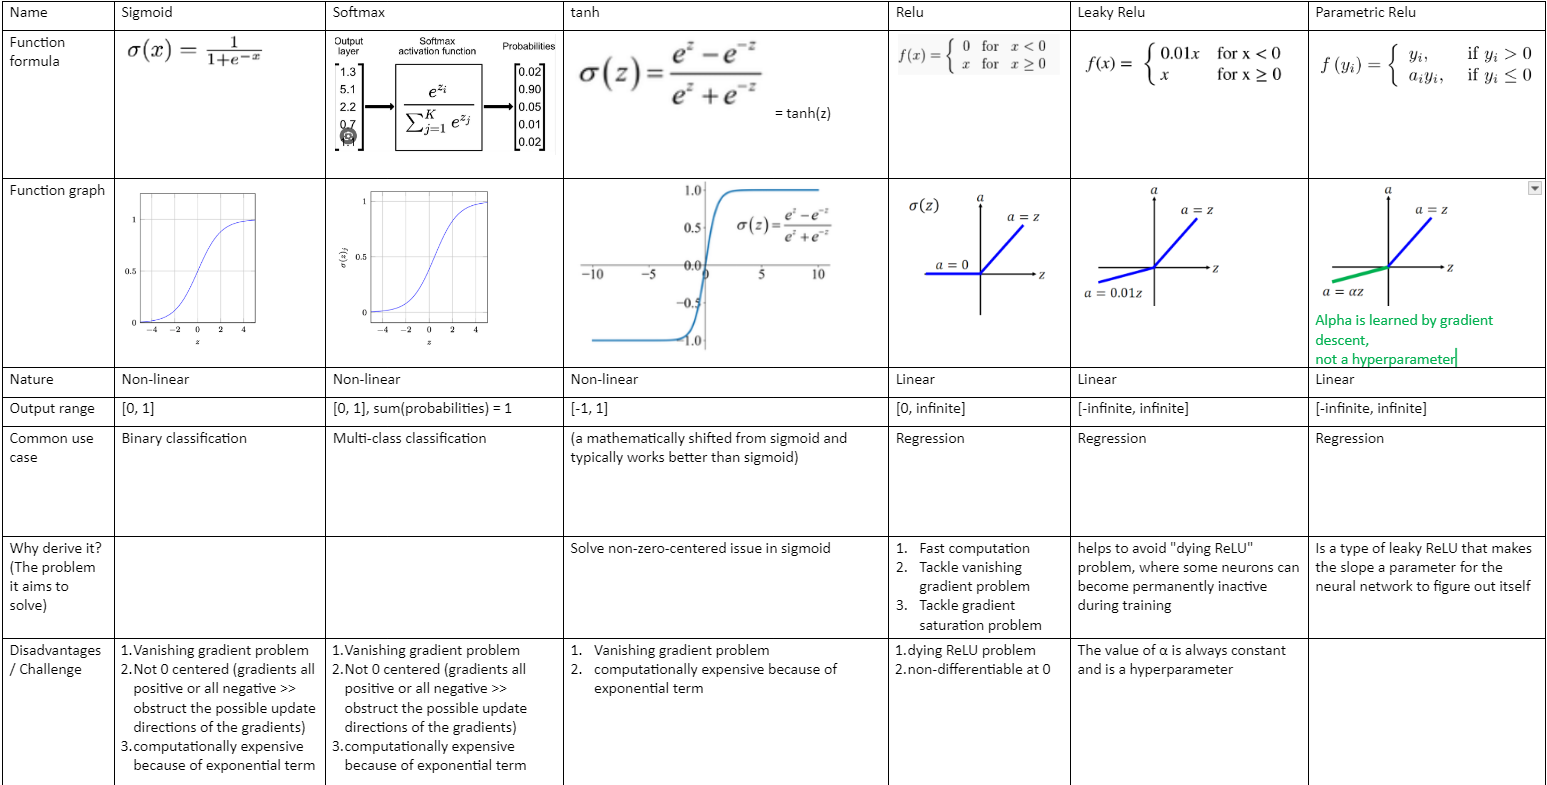

Summarized by myself.  

## Training Neural Networks <a name="nn_train"></a>

How to train a neural network using (labeled) data? I.e., how do we learn the weights in the network $\{w_{ij}\}$ from data?

### Objective Function <a name="nn_train_objective"></a>

Like many other machine learning models (e.g., linear regression), neural network is trained by optimizing certain **objective function.**  
An objective function is essentially a **goodness-of-fit metric** - it **describes how well a model fits a given set of data.**  
Therefore, <font color="red">training a neural network is a process of optimizing some well-defined objective function, in order to fit the model to the training data.</font>

<font color="blue">This should not be confused with **performance metrics** that we use to evaluate or fine-tune neural networks (e.g., accuracy, precision/recall, RMSE...)</font>

For data instance $i \in \{1, \ldots, N\}$, denote the matrix of input data as $\boldsymbol{X_i}$ and the neural network's predictions as $\widehat{y_i}$, we can write $\widehat{y_i} = F(\boldsymbol{X_i}; \boldsymbol{W})$, where $\boldsymbol{W}$ are the weights to be learned and $F(.)$ is some complex function that links input to output via weights and activations.   

Here are some common choices of objective function $L(\widehat{y}, y)$:

1. Quadratic loss:

$$L(\widehat{y}, y) = \frac{1}{2} \sum_{i=1}^{N} (\widehat{y_i} - y_i)^2$$

- Often used for numeric **prediction** tasks. This is the same as **OLS**;
- The constant 1/2 is there only for mathematical convenience;
- <font color="red">Question: Why do we take square of the errors $\widehat{y_i} - y_i$, rather than just summing over the errors or the absolute errors?</font>

2. (Binary) Cross-Entropy loss:

$$L(\widehat{y}, y) = - \sum_{i=1}^{N} (y_i\log(\widehat{y_i}) + (1-y_i)\log(1-\widehat{y_i}))$$

- Often used for **binary classification** tasks. This is the same as the log likelihood of a logit regression objective function;
- Note that here $y_i \in \{0,1\}$ and $\widehat{y_i}$ is a predicted probability;
- <font color="blue">Intuition: </font> $L(\widehat{y}, y)$ is smaller if $\widehat{y_i}$ is closer to 1 when $y_i = 1$ and closer to 0 when $y_i = 0$.
- Other reference: https://web.stanford.edu/~jurafsky/slp3/5.pdf

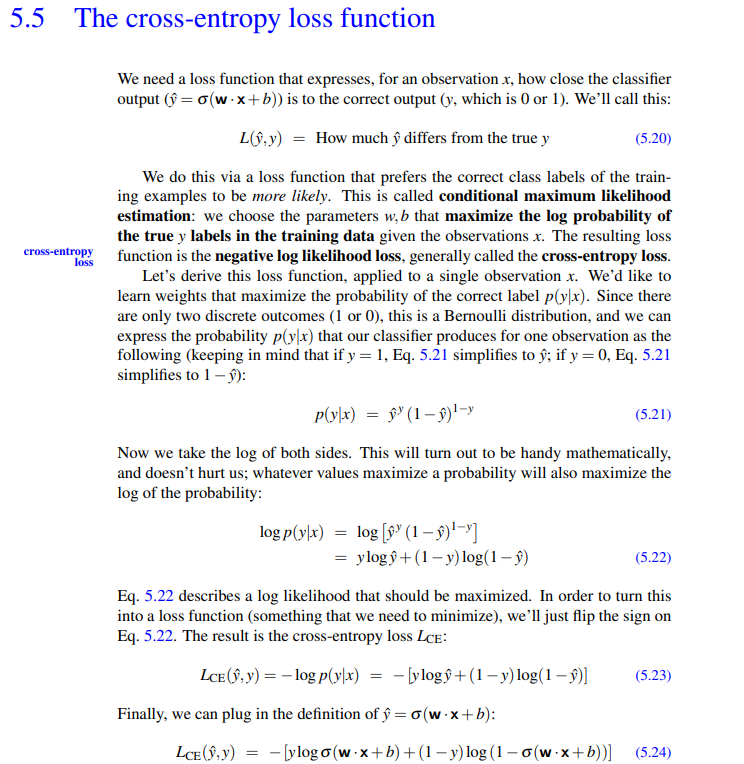


3. (Categorical) Cross-Entropy loss
$$L(\widehat{y}, y) = - \sum_{i=1}^{N} \sum_{j=1}^{k} y_{ij}\log(\widehat{y_{ij}})$$

- Often used for $k$-class classification tasks. This is a direct generalization of binary cross-entropy;
- Notationally, $y_{ik}$ is a binary indicator of whether data point $i$ belongs to class $j$ or not (i.e., one-hot encoded), and $\widehat{y_{ij}}$ is the model's predicted probability that data point $i$ belongs to class $j$.
- <font color="blue">Intuition: </font> $L(\widehat{y}, y)$ is smaller when the predicted probability is high for the correct class.

<font color="red">Note that all of the above objective functions are formulated as "losses", i.e., smaller value indicates better fit.  
This is why we often call them as **loss functions** and we want to **minimize the loss functions**.

More formally, training a neural network amounts to solving the following minimization problem:  
$$\text{Find weights } \boldsymbol{W} \text{ such that } L(\widehat{y}, y) \text{ is minimized.}$$</font>

### Gradient Descent <a name="nn_train_gradient"></a>

So, given a set of data and a well-defined loss function to be minimized. How do we actually minimize it? This is where **training algorithms** come into play. There are a large number of training algorithms developed in the optimization research. One of the most classic is **gradient descent**. 

<font color="red">**Intuition of how gradient descent works:   
    Optimize the training process by moving toward the opposite way to the sign of the gradient by a certain distance.**</font>

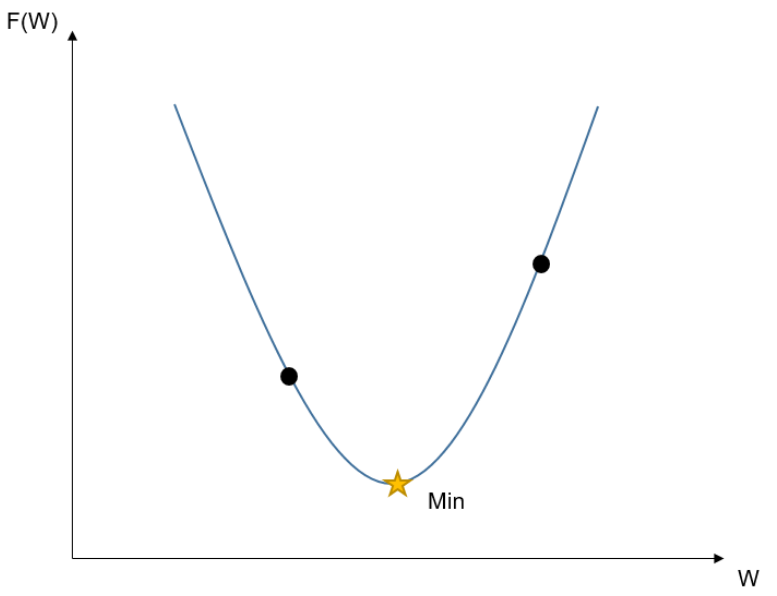

- Gradient descent works because **the opposite of the gradient gives the most effective direction to reduce value of a function**;
- The distance to move is obviously important. Move too little, then it may take a long time to reach the minimum. Move to much, you may "go pass" the minimum. The distance is partially controlled by **step size** or **learning rate**, which is a **hyper-parameter to be set by the user and fine-tuned**;
- Intuitively, it makes sense to dynamically change the learning rate. For example, maybe start with a large learning rate, then gradually decrease it. This is the idea behind **adaptive learning rates**.

There are a large number of other optimization algorithms, many building on the basic gradient descent, such as momentum, Adam, Adagrad, RMSprop, ... Check out "Additional Resources" for details if you are interested. 

Finally, for general guidelines on how to fine-tune a neural network model. I highly recommend this GitHub repo: [Deep Learning Tuning Playbook](https://github.com/google-research/tuning_playbook)

### Batch, Epoch, and Stochastic Gradient Descent <a name="nn_train_sgd"></a>

**The problem with basic gradient descent discussed above:**  
In principle, you can perform gradient descent on the entire set of training data (for multiple iterations) until it's done.  
However, this can be computationally very expensive in practice especially if the size of training data is very large, because calculating the gradient of loss function $L(\widehat{y}, y)$ involves calculating the gradients associated with each data point then add them up. 

**The solution - stochastic gradient descent:**  
Don't using all the training data every time you want to calculate a gradient. Instead, use a **subset** of it each time, called a **batch** of training data points, to calculate gradient. For instance, if you have 100 training data points and adopt a batch size of 20, then you can perform 5 gradient descent iterations (i.e., parameter updates) during one scan pass of the training dataset. Finally, you can scan pass the same training dataset multiple times during the entire process of gradient descent. <font color="red">**Each time you scan through the training dataset is called an epoch, so there will be several batches within a singel epoch.**</font>

<font color="blue">Note:</font> sometimes, people refer to stochastic gradient descent specifically as the version where every time you only use a single data point to calculate gradient and perform update (i.e., set batch size to 1), and refer to the case described above as **mini-batch gradient descent** (i.e., set batch size somewhere between 1 and total training data size). These are mostly terminology differences.

## Build Neural Networks with Keras <a name="nn_implementation"></a>

Let's try some examples. For demonstration, I will implement a feedforward neural network for classification using the classic [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

In [1]:
# Import packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
# Read in the dataset
x = []
y = []
for line in open("iris.csv"):
    data = line.rstrip('\n').split(',')
    x.append(data[0:4])
    y.append(data[4])

# convert feature lists to a numpy array
x = np.array(x, dtype = float)
# one-hot encode the label (3 classes) - a manual approach
label = np.zeros((len(y), 3))
for i in range(len(y)):
    if y[i] == 'Iris-setosa':
        label[i][0] = 1
    if y[i] == 'Iris-versicolor':
        label[i][1] = 1
    if y[i] == 'Iris-virginica':
        label[i][2] = 1 
label = np.array(label, dtype = float)

# training-validation split (70% training)
x_train, x_val, label_train, label_val = train_test_split(x, label, test_size = 0.3)
print(x_train.shape, x_val.shape, label_train.shape, label_val.shape)

(105, 4) (45, 4) (105, 3) (45, 3)


In [9]:
data
# this is how the data look like: 4 preditcors, and the last column is label 

['5.9', '3.0', '5.1', '1.8', 'Iris-virginica']

In [43]:
# Now, let's specify the neural network structure using the Sequential class of Keras
model_nn = keras.Sequential()

# First, add the input layer, specify the shape of input (a feature vector of 4 elements)
model_nn.add(keras.layers.InputLayer(input_shape = (4,)))

# Second, add the hidden layers (as many as you'd like, I'm only adding 1 hidden layer here for demonstration)
# I'm adding 8 neurons in this layer, with ReLU activation
model_nn.add(keras.layers.Dense(units = 8, activation = 'relu')) 

# Finally, specify the output layer - must have 3 units here because there are 3 classes to predict
model_nn.add(keras.layers.Dense(units = 3, activation = 'softmax')) 

In [44]:
# Configure the training process
model_nn.compile(loss = keras.losses.CategoricalCrossentropy(),  # This is the loss function
                 optimizer='sgd',  # This is the optimization algorithm
                 metrics=['accuracy'])   # This is the metric you want it to report (note, it is not maximizing this metric per se)

In [45]:
# Check the model summary to make sure things are ok
model_nn.summary()
# Where does the two "Param #" come from? Can you explain how they are calculated?

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [10]:
(4+1)*8

40

In [11]:
(8+1)*3

27

In [46]:
# Now, perform training
model_nn.fit(x = x_train, y = label_train, validation_data = (x_val, label_val),
             epochs = 30, batch_size = 30)

Epoch 1/30
4/4 [==============================] - 0s 64ms/step - loss: 2.3660 - accuracy: 0.3086 - val_loss: 1.1593 - val_accuracy: 0.4000
Epoch 2/30
4/4 [==============================] - 0s 16ms/step - loss: 1.1337 - accuracy: 0.3986 - val_loss: 1.0201 - val_accuracy: 0.6444
Epoch 3/30
4/4 [==============================] - 0s 14ms/step - loss: 0.9928 - accuracy: 0.6495 - val_loss: 0.9175 - val_accuracy: 0.6667
Epoch 4/30
4/4 [==============================] - 0s 14ms/step - loss: 0.8836 - accuracy: 0.6967 - val_loss: 0.8473 - val_accuracy: 0.6667
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 0.8496 - accuracy: 0.6567 - val_loss: 0.7937 - val_accuracy: 0.6667
Epoch 6/30
4/4 [==============================] - 0s 15ms/step - loss: 0.7768 - accuracy: 0.6867 - val_loss: 0.7511 - val_accuracy: 0.6667
Epoch 7/30
4/4 [==============================] - 0s 15ms/step - loss: 0.7376 - accuracy: 0.6822 - val_loss: 0.7214 - val_accuracy: 0.6667
Epoch 8/30
4/4 [===========

In [47]:
# Make predictions
model_nn.predict([[5.1,3.5,1.4,0.2]])

array([[0.8930898 , 0.08641573, 0.02049459]], dtype=float32)

Next, please try this out using the [Breast Cancer Detection](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) dataset yourself.

In [12]:
# Data import and pre-processing
x = []
y = []
for line in open("breast_cancer.csv"):
    # get rid of header line
    if 'Class' not in line:
        data = line.rstrip('\n').split(',')
        x.append(data[0:9])
        y.append(data[9])

# convert feature lists to a numpy array
x = np.array(x, dtype = float)
# one-hot encode the label (2 classes) - a manual approach
label = np.zeros((len(y), 2))
for i in range(len(y)):
    if y[i] == '2':
        label[i][0] = 1
    if y[i] == '4':
        label[i][1] = 1
label = np.array(label, dtype = float)

# training-validation split (70% training)
x_train, x_val, label_train, label_val = train_test_split(x, label, test_size = 0.3)
print(x_train.shape, x_val.shape, label_train.shape, label_val.shape)

(478, 9) (205, 9) (478, 2) (205, 2)


In [ ]:
# Write your code here

# Additional Resources <a name="resource"></a>

- [Wiki page on activation functions](https://en.wikipedia.org/wiki/Activation_function). There are a lot of other activation functions;
- A blog post about various gradient-descent-based optimization algorithms: [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/);